# Chunk Solver

This document provides a basic approach to solving chunk accounts mathematically. This includes describing the gamestate before entering the chunk, the gamestate after completing the chunk, and the time taken to complete the chunk (where the latter two are taken to be probability distributions). By solving each chunk generically, it would be feasible to build an exact solver for any sequence of chunks.

## 1. The Chunk Picker

A "chunk account" has the restriction that it can only access a set number of chunks, which divide the 2D surface map.

$$S_N = \{(x_1, y_1), (x_2, y_2), ... (x_N, y_N)\}$$

It is more common to enumerate the chunks themselves instead of using coordinates, which we can then express as:
$$S_N = \{c_1, c_2, ..., c_N\}.$$

In most cases, players begin with a single chunk $c_1=(x_1, y_1)$ (although it's easy to imagine starting with an initial set). Within each chunk, the player must achieve certain objectives that have requirements. Due to the severe restriction (especially early on), these tasks may take very long times. Regardless of what objectives are set, the chunks evolve in distinct epochs:

<!-- $$S_{N}(\sigma, t_0) \to_{\Delta\sigma, \tilde t} \to S_{N+1}(\sigma_{N+1})$$ -->
$$S_{N}(\sigma_N, t_N) \to S_{N+1}(\sigma_{N}+\Delta\sigma_N, t_N+\tilde t)$$

Where here we denote the game state as $\sigma$, which includes the player's stats, bank, inventory, etc., with $\Delta\sigma$ representing its change. Finally, we start the chunk at time $t_0\in \N$, which is measured in ticks, and end according to a distribution $\tilde t$ since the game has random elements. Once a chunk is completed $t_{N+1}$ is set, and the equation iterates until all chunks are completed or some other end-state (eg: maxing) is achieved.


## 2. Chunk Evolution

We can denote the operator $\hat P$, which evolves the chunk set:

$$\hat P S_N = S_{N+1}.$$

We can assume that one chunk is selected at a time, so that:
$$|\hat P S_N| = |S_N| + 1$$
$$|S_N|=N. $$
The set of chunks to choose from are normally taken to be the adjecent set of chunks to $S_N$. Here is [a tool by Source Chunk to generate chunks](https://gitgeddes.github.io/ChunkPicker/).

## 3. Within a Chunk

The set of chunks a player has is largely random while generally being much easier to model than the description of the solution for a chunk, so the focus is more on solving individual chunks. This means taking, as input, the game state at the begining of any chunk, and determining both the output game state, and the time distribution to complete it (an average estimate could also be considered a solution).

Let's consider an example. Here are the basic requirements specified by [Limpwurt](https://www.youtube.com/watch?v=ayOxdJJawuo&list=PLDeBkMwh3gDO0nvTsWNJafdtz37IID1SF&ab_channel=Limpwurt) on his account that starts with $c_1$ as the initial game spawn point, Lumbridge.
In the picture below, you can see that he effectively sets out these requirements to be accomplished within the initial chunk:
- 99 woodcutting
- 99 defence
- 72 fletching (boostable)
- 60 firemaking

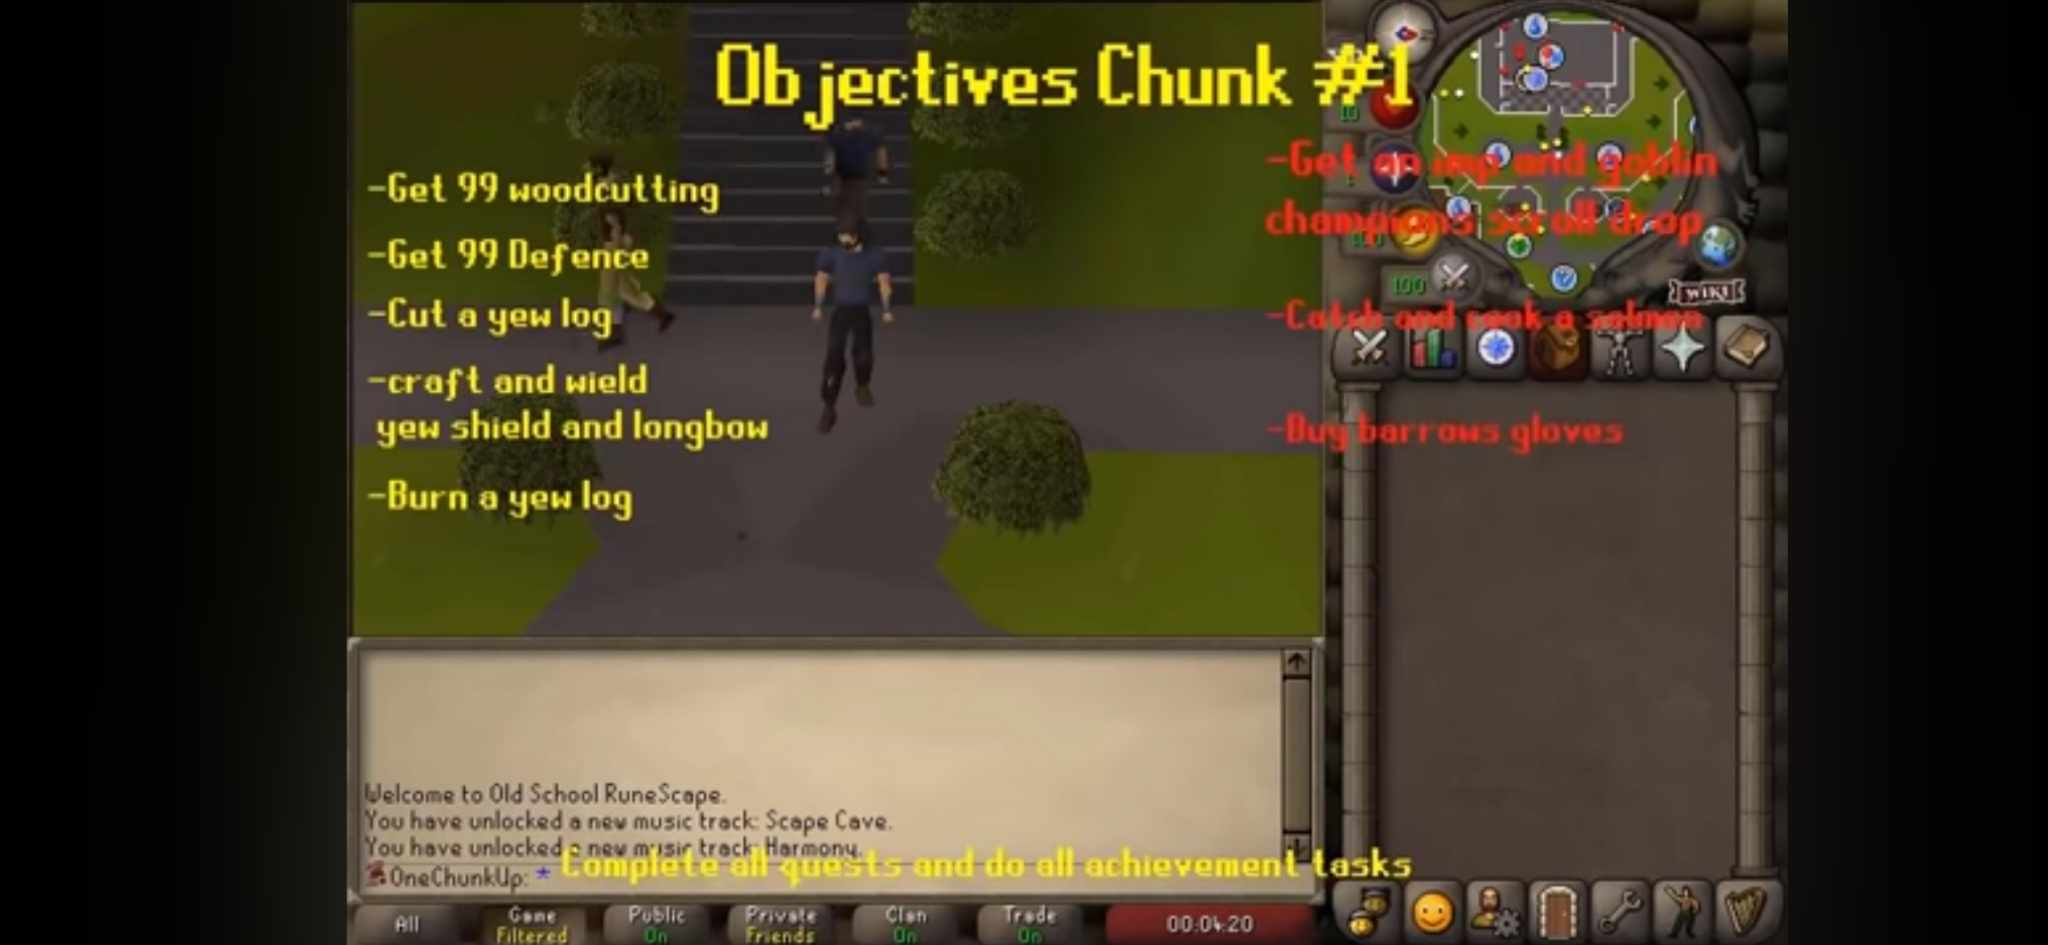

Let's just focus the analysis on one of these, like 60 firemaking. In fact, if we restrict our account even further, it will simplify things; its best to start with the simplest case. If the account cannot use shops as well for example, it would make woodcutting not possible and would sigificantly restict the source of firemaking material. Furthermore if a bank cannot be used, as is the case of an ultimate ironman, it further means that techniques to store items cannot be used and again we simplify the solution by restricting the search space (set of possible actions). This is important since it would be possible that from a previous chunk we obtained lots of various logs (eg: oak log), then we would need to plan for every possible input item that may provide experience. Meaning, we would need to start with an initial vector $(x, y, z, ...)$, where each element presents the number of (normal logs, oak logs, willow logs, etc.). This is so that we can connect any two chunks together ($\sigma_N \to \sigma_{N+1}$), but again for simplicity we assume no other items to begin with. 


Under these most restrictive rules, the only way to train firemaking is by picking up from the four log spawns in the castle and simply burning them. We will also assume the character switches worlds instantly and does so after every time it picks up the 4 logs. Furthermore, since we expect to consume each log, there is no change in $\sigma$ other than the player's firemaking level.

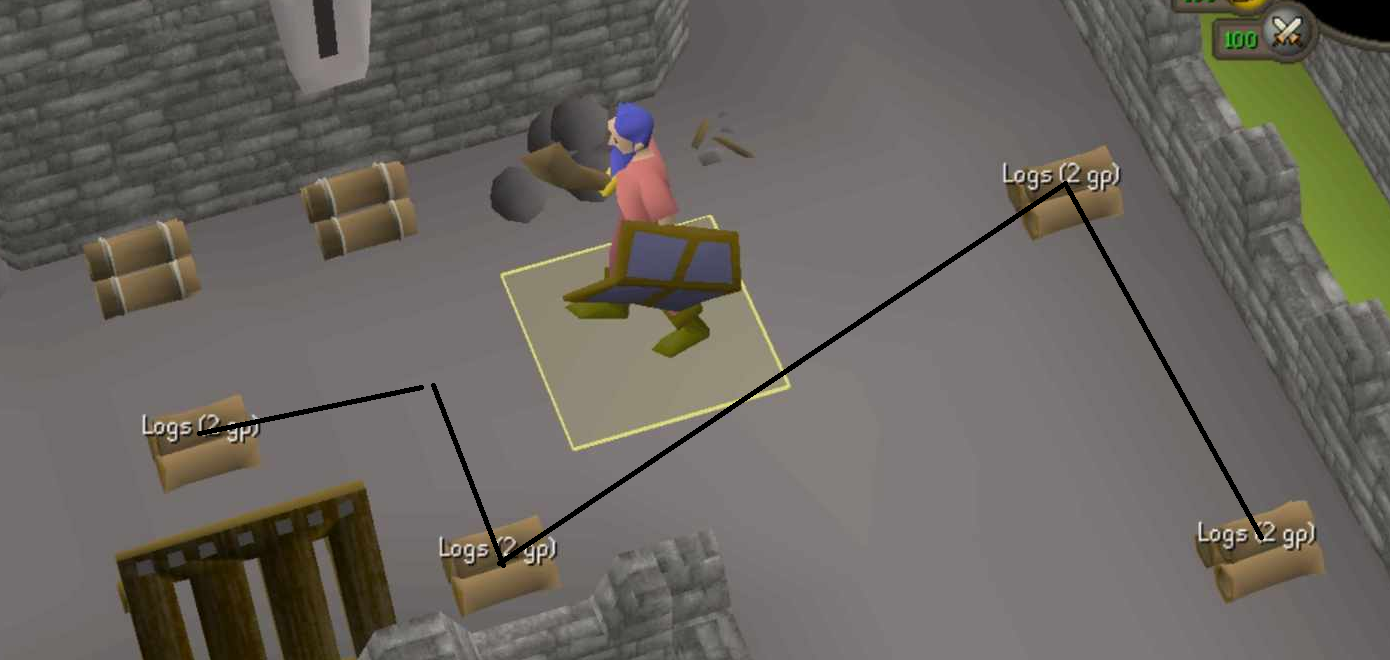

The player starts with level one firemaking, and we can assume that it took $T_1$ ticks to obtain the tinderbox and to then stand on the first log spawn location.
$$L^{FM}_{1} = 1; t_1 = T_1$$

Now, the only actions the player can perform is to pick up the logs and burn them. There are four, so there could be the question of what sequence should the logs be picked up. The number of ticks required to pick up the logs depends on the sequence of tiles. The picture above denotes the most logical order. Here is the sequence of number of tiles travelled, where 2 represents a run, and 1 represents a walk: 2; 2, 1; 1, 1. The player can run up to 2 tiles per tick, so we simply have 5 ticks to pick up the logs. The time to return to the initial spot is ignored since we assume instant switching to a fresh world. To get from 1 to 60 requires 6844 logs, which would add 34,220 ticks for collection time (call this $T_2$).


The next step is to calculate how long it would take to burn 6844 logs without pause. This turns into a recursive equation because the burn rate depends on the level. 25 experience per log and according to the [following picture](https://oldschool.runescape.wiki/w/Firemaking#Success_chance), the rate goes from "65/256 at level 1 and 513/256 at level 99 (with 256/256 being achieved at 43), interpolating linearly in between". From the [runescape wiki](https://runescape.fandom.com/wiki/Game_tick/Ticks_per_action), it seems like it takes 4 ticks per attempt.

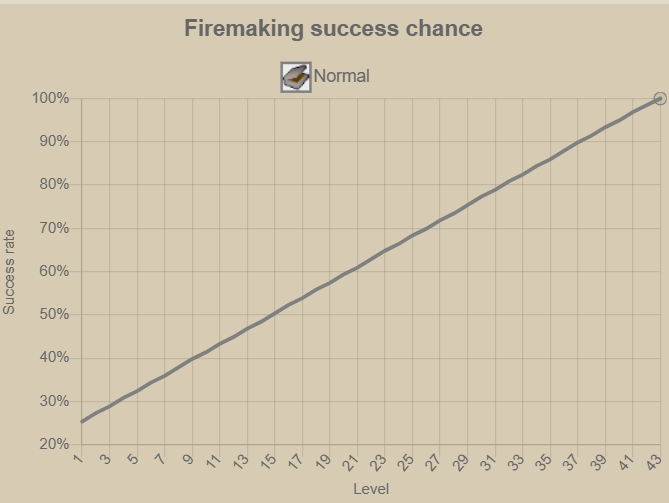


So the number of ticks is expressed as:
$$t_{L} = 4 * r_{L} * n_{L}$$

where $n_{L}$ is the number of logs required to level up from level $L$ to $L+1$, and $r_{L}$ is probability of sucessfully burning the logs. In fact at level 43, the rate is 100%, which means that we always burn sucessfully and the number of ticks is simply 4 ticks per log, with 43-60 requiring 5586 logs and so $T_4 = 22,344$ ticks. This leaves 1,259 logs from level 1 to level 43 in a stepwise fashion checking [the number of logs for each increment](https://oldschool.tools/calculators/skill/firemaking). This is done in the code below, which calculates $\tilde T_3=7,191$, on average (in practice it is a distribution, so we denote with tilde). The time it takes while learning the skill is given by
$$\tilde{T}_3 = \sum_{L=1}^{43} t_{L},$$
where $t_{L}$ is the time taken per level. 


Putting everything together, the solution for this account is $\tilde t = T_1 + T_2 + \tilde T_3 + T_4$ and $\sigma_N = \sigma_{N+1}$ meaning $\Delta \sigma = \vec 0$. Finally, we assume the player retains their initial tinderbox and takes about 16s (27 ticks) to get up the staircases estimating:
$$\tilde t = T_\text{tinderbox} + T_\text{collecting} + \tilde T_\text{learning} + T_\text{mastery}$$
$$\tilde t = 27 + 34,220 + 7,191 + 22,344$$
$$\tilde t = 63,782.$$

Therefore is takes about 10.6h to beat this version of the initial lumbridge chunk, and 60 firemaking (273780 experience) is the only thing earned.



## 5. Discussion

This shows a proof of concept for the ability to solve a chunk exactly. It's possible to include probability distributions and to introduce more objectives and freedom into the calculations. Ultimately, the key to solving the chunk account more completely is to iteratively lift restrictions starting with the most specific set. This provides a systematic way to solve each chunk, and therefore estimate the minimum number of ticks possible to complete a set of chunks. In fact, if done in totality, this method would also solve the game generically. Said another way, as the number of chunks solved approaches the total number of chunks in the game, the solution becomes more exact for the general game (any input to any output).

Another example of this type of solution is solving the [the optimal questing order](https://oldschool.runescape.wiki/w/Optimal_quest_guide/Ironman#quests), which involves assessing the time distribution (eg: how many ticks of walking, or running, etc does each quest take?), along with what was consumed and what was obtained (again, captured by $\sigma$ and $\tilde t$).

In [13]:
## Calculating T3 (learning)
# Here is the number of logs required between each level from 1, 43
TIME_PER_LOG = 4
logs_needed_per_level = [
    3, 3, 3, 3, 4, 4, 4, 5, 5, 6,
    6, 7, 7, 8, 9, 10, 11, 12, 13, 14,
    16, 17, 19, 21, 23, 25, 28, 31, 34, 37,
    41, 45, 50, 55, 61, 67, 74, 81, 90, 99,
    109, 121, 133
]
starting_scaling_factor = 65 / 256  # Scaling factor at level 1
ending_scaling_factor = 1  # Scaling factor at level 43 (256/256)
rate = (ending_scaling_factor - starting_scaling_factor) / (43 - 1)

total_time = 0
for level, logs_needed in enumerate(logs_needed_per_level, 1):
    r = 0.25 + rate * (level - 1)
    time = TIME_PER_LOG * logs_needed / r
    total_time += time

    print(level, total_time, time)

print("total_time: ", total_time)

1 48.0 48.0
2 92.8155609586662 44.815560958666204
3 134.8429225221841 42.027361563517914
4 174.40869989108933 39.565777368905245
5 224.2441575967672 49.83545770567787
6 271.46677631760167 47.222618720834475
7 316.3368858637676 44.870109546165885
8 369.7629728202893 53.42608695652174
9 420.7686654199098 51.005692599620495
10 479.32278386783355 58.554118447923756
11 535.4445759513482 56.12179208351457
12 598.3086394301538 62.8640634788056
13 658.7616514783466 60.453012048192775
14 725.2988783203501 66.53722684200348
15 797.4868678764859 72.18798955613578
16 874.9368948889116 77.4500270124257
17 957.2990118805551 82.36211699164346
18 1044.2570573733942 86.9580454928391
19 1135.5244422901426 91.26738491674828
20 1230.84057336502 95.31613107487732
21 1336.5762832605333 105.73570989551321
22 1445.7173490912542 109.141065830721
23 1564.3170588154921 118.59970972423804
24 1691.8651452439626 127.54808642847057
25 1827.8915478842266 136.02640264026402
26 1971.9622969127674 144.0707490285408
27 2